Initial data
- Active 10 uM threshold
1 -> 2758
- Inactive 10 uM threshold
2757 -> 3723

In [1]:
HERG = open("ci400308z_si_002.txt", "r")
HERG_ = HERG.readlines()[1:]

In [2]:
HERG_[0:5]

['O=C(NC1CCN(Cc2ccc3c(c2)OCCO3)CC1)c1cc(=O)c2ccc(F)cc2o1 CHEMBL425448\n',
 'COc1cccc(N2CCN(CCCCCCN3CCN(c4cccc(Cl)c4)CC3)CC2)c1 CHEMBL1173143\n',
 'CNC(C)c1cc(C)ccc1Oc1ccc(Cl)c(Cl)c1 CHEMBL453631\n',
 'CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C(C)C)C2O)C(C)(O)CC(C)C(O)C(C)C(O)C1(C)O CHEMBL584549\n',
 'O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCC(c3ccc(O)cc3)CC2)C1 CHEMBL1829613\n']

In [3]:
HERG_[0]

'O=C(NC1CCN(Cc2ccc3c(c2)OCCO3)CC1)c1cc(=O)c2ccc(F)cc2o1 CHEMBL425448\n'

In [4]:
from rdkit import Chem
import pandas as pd

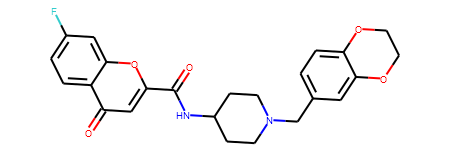

In [5]:
Chem.MolFromSmiles(HERG_[0])

## SPLIT DATA TO SMILES and ChEMBL CID

#### ACTIVE AND INACTIVE

In [6]:
smiles = HERG_[0].split(' ')[0]

In [7]:
smiles

'O=C(NC1CCN(Cc2ccc3c(c2)OCCO3)CC1)c1cc(=O)c2ccc(F)cc2o1'

In [8]:
CID = HERG_[0].split(' ')[1]

In [9]:
CID

'CHEMBL425448\n'

In [10]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
m1 = molecule.filter(chembl_id='CHEMBL192').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
m1[0]['molecule_structures']['canonical_smiles']

'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12'

In [11]:
SMILES_ = [initials.split(' ')[0] for initials in HERG_[:2755]]

In [12]:
SMILES_[2754]

'O=C(NCc1ccc(F)cc1)N(c1ccc(Br)cc1)C1CCN(CCO)CC1'

In [13]:
SMILES_[0]

'O=C(NC1CCN(Cc2ccc3c(c2)OCCO3)CC1)c1cc(=O)c2ccc(F)cc2o1'

In [14]:
SMILES_[-1]

'O=C(NCc1ccc(F)cc1)N(c1ccc(Br)cc1)C1CCN(CCO)CC1'

In [15]:
len(SMILES_)

2755

In [16]:
ACTIVE = pd.DataFrame(SMILES_, columns=['SMILES'])

In [17]:
ACTIVE['ACTIVITY 0 or 1'] = [1 for i in range(len(SMILES_))]

In [18]:
ACTIVE.shape

(2755, 2)

In [19]:
ACTIVE.describe()

,ACTIVITY 0 or 1
count,2755.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [20]:
SMILES_ = [initials.split(' ')[0] for initials in HERG_[2757:3723]]

In [21]:
SMILES_[0]

'Cc1cccc(C2CCC(CNC(=O)c3ccc(-c4nc5cc(C#N)cc(C(C)C)c5o4)cc3)CC2)c1'

In [22]:
SMILES_[-1]

'CC1CCCN1CCc1ccc2nc(-c3ccncc3)ccc2c1'

In [23]:
INACTIVE = pd.DataFrame(SMILES_, columns=['SMILES'])

In [24]:
INACTIVE['ACTIVITY 0 or 1'] = [0 for i in range(len(SMILES_))]

In [25]:
INACTIVE.shape

(966, 2)

In [26]:
INACTIVE.head()

,SMILES,ACTIVITY 0 or 1
0,Cc1cccc(C2CCC(CNC(=O)c3ccc(-c4nc5cc(C#N)cc(C(C...,0
1,COc1ccc2nccc(NC(=O)C3(O)CCC(NCc4cnc5c(c4)OCCO5...,0
2,Cc1ncoc1-c1nnc(SCCCN2CCc3cc4c(cc3CC2)N(C)C(=O)...,0
3,Cc1nc(CNC2CCC(F)C2)c(C(C)C)n1-c1cc(F)cc(F)c1,0
4,COc1cc2nc(N3CCN(C(=O)C4CCCO4)CC3)nc(N)c2cc1OC,0


In [27]:
frames = (ACTIVE, INACTIVE)
concate = pd.concat(frames)

In [28]:
concate

,SMILES,ACTIVITY 0 or 1
0,O=C(NC1CCN(Cc2ccc3c(c2)OCCO3)CC1)c1cc(=O)c2ccc...,1
1,COc1cccc(N2CCN(CCCCCCN3CCN(c4cccc(Cl)c4)CC3)CC...,1
2,CNC(C)c1cc(C)ccc1Oc1ccc(Cl)c(Cl)c1,1
3,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,1
4,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCC(c3cc...,1
...,...,...
961,Cc1c(=O)c2cccc(C(=O)OCCN3CCCCC3)c2oc1-c1ccccc1,0
962,CCCCN1CCCCC1C(=O)Nc1c(C)cccc1C,0
963,CC1CCCN1CCc1ccc2nc(C3CC3)ccc2c1,0
964,COC(=O)C1=CCC2CCC1N2C,0


In [29]:
concate = concate.rename(columns={'SMILES': "SMILES", 'ACTIVITY 0 or 1': 'target_0'})

In [30]:
concate.head()

,SMILES,target_0
0,O=C(NC1CCN(Cc2ccc3c(c2)OCCO3)CC1)c1cc(=O)c2ccc...,1
1,COc1cccc(N2CCN(CCCCCCN3CCN(c4cccc(Cl)c4)CC3)CC...,1
2,CNC(C)c1cc(C)ccc1Oc1ccc(Cl)c(Cl)c1,1
3,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,1
4,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCC(c3cc...,1


In [31]:
concate = concate.reset_index()

In [32]:
empty_cells = concate[concate['SMILES'] == '']

In [33]:
empty_cells

,index,SMILES,target_0


In [34]:
empty_cells = concate[concate['SMILES'] == '#']

In [35]:
empty_cells 

,index,SMILES,target_0


In [36]:
concate = concate[(concate['SMILES'] != '') & (concate['SMILES'] != '#')]

In [37]:
concate['SMILES'].describe()

count                                                  3721
unique                                                 3721
top       Cc1c(-c2ccc(Cl)cc2)noc1-c1ccc2cc(CCN3CCCC3C)cc...
freq                                                      1
Name: SMILES, dtype: object

In [38]:
reduced_SMILES = concate['SMILES'].drop_duplicates()

In [39]:
len(reduced_SMILES)

3721

In [40]:
concate.to_csv('data.csv')

## Aggregation

In [41]:
import pandas as pd
import numpy as np

In [42]:
data_ = pd.read_csv('data.csv')

In [43]:
data_.head()

,Unnamed: 0,index,SMILES,target_0
0,0,0,O=C(NC1CCN(Cc2ccc3c(c2)OCCO3)CC1)c1cc(=O)c2ccc...,1
1,1,1,COc1cccc(N2CCN(CCCCCCN3CCN(c4cccc(Cl)c4)CC3)CC...,1
2,2,2,CNC(C)c1cc(C)ccc1Oc1ccc(Cl)c(Cl)c1,1
3,3,3,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,1
4,4,4,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCC(c3cc...,1


In [44]:
data_['SMILES'].describe()

count                                                  3721
unique                                                 3721
top       Cc1c(-c2ccc(Cl)cc2)noc1-c1ccc2cc(CCN3CCCC3C)cc...
freq                                                      1
Name: SMILES, dtype: object